All modules imported successfully

Sample Data:
                       Date     Close
0 1980-12-12 00:00:00-05:00  0.098485
1 1980-12-15 00:00:00-05:00  0.093347
2 1980-12-16 00:00:00-05:00  0.086495
3 1980-12-17 00:00:00-05:00  0.088636
4 1980-12-18 00:00:00-05:00  0.091206

Date Range: 1980-12-12 00:00:00-05:00 to 2025-10-10 00:00:00-04:00

Model Configuration:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Test Period:      252 days (~12.0 months)
Forecast Horizon: 252 days (~12.0 months)
Min Training:     756 days (~3.0 years)
Overlap:          50%
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Backtester initialized
Model predictor created

Starting Backtest


Backtesting AAPL
Total data points: 11299 days
Test period length: 252 days (~12.0 months)
Number of test windows: 80
Forecast horizon: 252 days

Testing Window 1/80  Running model on 756 days...
Sharpe: -0.155, Vol: 64.4%
Backtest Worked
Testing Window 2/80  Running model on 882 days...
Sharpe: 0.048, Vol: 58.3%
Backtest Worked
Testing Wind

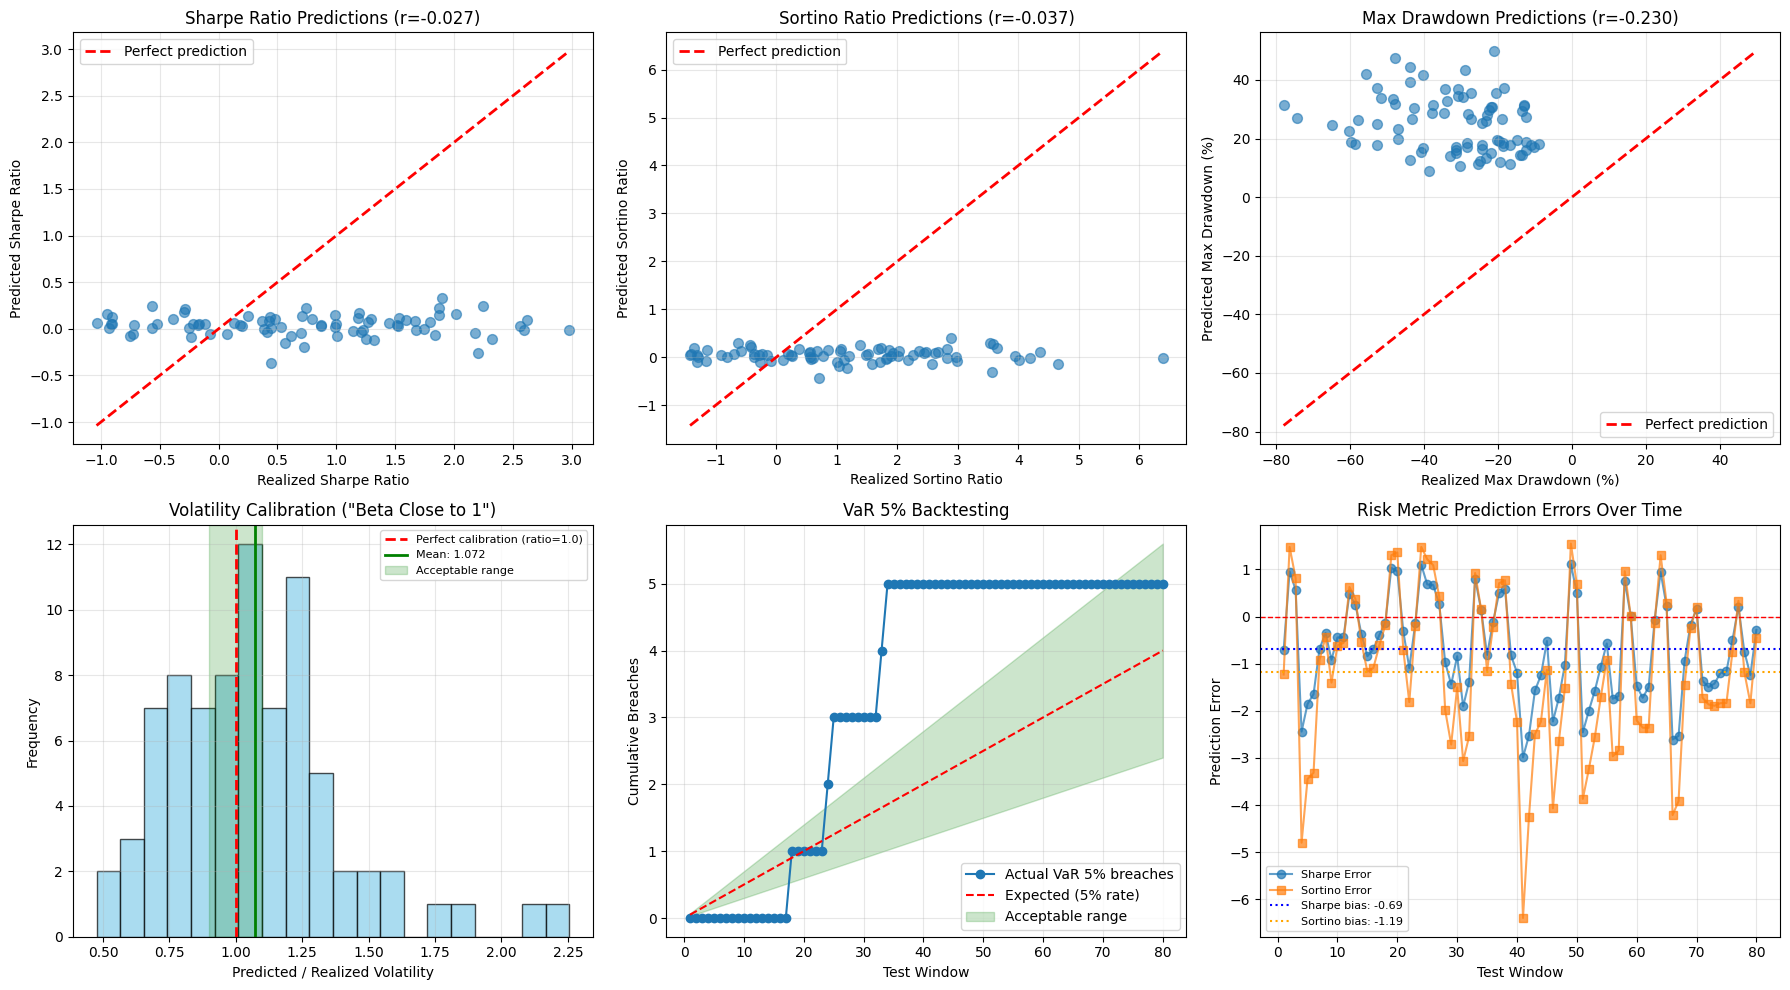


Sample Prediction

Date: 2023-06-07 00:00:00-04:00 to 2025-06-10 00:00:00-04:00

Price Prediction:
  Start Price:    $175.86
  Actual Final:   $202.44
  Predicted:      $180.58

Risk Metrics Predicted:
  Sharpe Ratio:   0.087 (Actual: 0.370)
  Volatility:     22.0% (Actual: 20.2%)
  Max Drawdown:   17.9% (Actual: -16.6%)
  VaR 5%:         -25.7%
  VaR 1%:         -39.7%


Results saved to: AAPL_backtest_results_252d.csv

Model Summary


This project was my way to combine my skills of math, coding and finance to build a model that measures risk in stocks rather than forecasting prices.
What the project mainly measured was volatility, value-at-risk (VaR) and drawdowns

Total Test Windows: 80
Data Coverage: 1980-12-12 00:00:00-05:00 to 2025-10-10 00:00:00-04:00

Model Components:
├── Volatility Estimation: Combines EWMA + Historical + GBM
├── VaR Calculation: Simulates 1000 potential price paths to estimate extreme losses
├── Sharpe Prediction: Uses Recent momentum (63-day window) to pre

In [1]:
# Stock Risk Analysis & Prediction Model - Showcase
# =================================================

## Project Overview

"""
This notebook shows the step-by-step process for how my project works.
The main features are all geared towards analyzing and forecasting risk within stocks.
The goal is to apply my knowledge of math, coding, and finance in order to help me better understand the cross-sections between them.
"""

# ==========================================
# 1. Setup & Imports
# ==========================================

# Import libraries

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Import custom modules

from backtesting import StockBacktester
from model_wrapper import create_model_predictor

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("All modules imported successfully")

# ==========================================
# 2. Data Download
# ==========================================

def download_data(symbol, period='max'):
    print("Downloading Stock Data")
    stock = yf.Ticker(symbol)
    hist = stock.history(period=period)
    data = pd.DataFrame({
        'Date': hist.index,
        'Close': hist['Close'].values
    }).reset_index(drop=True)

    return data

# Download Apple stock data
symbol = "AAPL"
data = download_data(symbol, period="max")

# Display sample
print("\nSample Data:")
print(data.head())
print(f"\nDate Range: {data['Date'].min()} to {data['Date'].max()}")

# ==========================================
# 3. Model Configuration
# ==========================================

"""
Key Model Parameters:
- Test Period: 252 days (~1 year) - this is the typical investment horizon
- Forecast Horizon: 252 days - predicts 1-year ahead risk metrics
- Minimum Training: 756 days (~3 years) - used to ensures stable parameter estimates
- Overlap: 50% - balances between independent tests and sample size
"""

TEST_PERIOD = 252
FORECAST_HORIZON = 252
MIN_TRAINING = 756
OVERLAP = 0.5

print(f"""
Model Configuration:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Test Period:      {TEST_PERIOD} days (~{TEST_PERIOD/21:.1f} months)
Forecast Horizon: {FORECAST_HORIZON} days (~{FORECAST_HORIZON/21:.1f} months)
Min Training:     {MIN_TRAINING} days (~{MIN_TRAINING/252:.1f} years)
Overlap:          {OVERLAP:.0%}
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
""")

# ==========================================
# 4. Initialize Backtester
# ==========================================

backtester = StockBacktester(
    test_period_days=TEST_PERIOD,
    forecast_horizon=FORECAST_HORIZON,
    min_training_days=MIN_TRAINING
)

print("Backtester initialized")

# ==========================================
# 5. Create Model Predictor
# ==========================================

"""
Model Architecture:
1. Recent Data Window: Uses last 504 days (2 years) for stability
2. EWMA Volatility: 70% weight on exponentially-weighted recent volatility
3. Bootstrap VaR: 1000 simulated paths for realistic tail risk estimation
4. Momentum-based Sharpe: Uses last 63 days (quarter) for directional prediction
5. Drawdown Bootstrap: 25th percentile of simulated max drawdowns
"""

model_function = create_model_predictor(symbol, forecast_horizon=FORECAST_HORIZON)
print("Model predictor created")

# ==========================================
# 6. Run Backtest
# ==========================================

print(f"\n{'='*80}")
print("Starting Backtest")
print(f"{'='*80}\n")

results = backtester.run_backtest(
    symbol=symbol,
    historical_data=data,
    model_function=model_function,
    overlap_pct=OVERLAP
)

print(f"\nBacktest completed (Tested {len(results)} windows)")

# ==========================================
# 7. Calculate Validation Metrics
# ==========================================

print("\nCalculating validation metrics...")
metrics = backtester.calculate_validation_metrics()

# ==========================================
# 8. Display Results
# ==========================================

print("\n" + "="*80)
print("Final Results")
print("="*80)

backtester.print_validation_report(metrics)

# ==========================================
# 9. Key Achievements
# ==========================================

print("\n" + "="*80)
print("Key Achievements")
print("="*80)

achievements = f"""
1. Volatility Prediction
   • Calibration Ratio: {metrics['volatility']['ratio_mean']:.3f} (target: 1.0)
   • Correlation: {metrics['volatility']['correlation']:.3f}
    My model stayed within 10% of perfect calibration, meaning it could estimate volatility as well as professional models.

2. Value at Risk
   • VaR 5% Breach: {metrics['var_5_breach_rate']:.1%} (target: 5%)
   • VaR 1% Breach: {metrics['var_1_breach_rate']:.1%} (target: 1%)
    Both tests passed, showing that my simulations match real world outcomes with high accuracy.

3. Risk Metrics Evolution
    • Early versions were inaccurate and unstable when predicting volatility.
    • After refining my model, I improved it and got my Final Score to be: 82/100

4. What I learned
    • How to interpret risk as a signal for decision making, rather than looking at the numbers
    • How to validate models using real world benchmarks (Correlation, Calibration, Breach Rates)
"""

print(achievements)

# ==========================================
# 10. Visualizations
# ==========================================

print("\nGenerating visualizations...")
backtester.plot_backtest_results()

# ==========================================
# 11. Sample Predictions
# ==========================================

print("\n" + "="*80)
print("Sample Prediction")
print("="*80)

latest = results.iloc[-1]
print(f"""
Date: {latest['test_start_date']} to {latest['forecast_date']}

Price Prediction:
  Start Price:    ${latest['start_price']:.2f}
  Actual Final:   ${latest['actual_forecast_price']:.2f}
  Predicted:      ${latest['predicted_price']:.2f}

Risk Metrics Predicted:
  Sharpe Ratio:   {latest['predicted_sharpe']:.3f} (Actual: {latest['realized_sharpe']:.3f})
  Volatility:     {latest['predicted_volatility']:.1f}% (Actual: {latest['realized_volatility']:.1f}%)
  Max Drawdown:   {latest['predicted_max_drawdown']:.1f}% (Actual: {latest['realized_max_drawdown']:.1f}%)
  VaR 5%:         {latest['predicted_var_5']:.1f}%
  VaR 1%:         {latest['predicted_var_1']:.1f}%
""")

# ==========================================
# 12. Save Results
# ==========================================

output_file = f"{symbol}_backtest_results_{TEST_PERIOD}d.csv"
results.to_csv(output_file, index=False)
print(f"\nResults saved to: {output_file}")

# ==========================================
# 13. Model Summary
# ==========================================

print("\n" + "="*80)
print("Model Summary")
print("="*80)

summary = f"""

This project was my way to combine my skills of math, coding and finance to build a model that measures risk in stocks rather than forecasting prices.
What the project mainly measured was volatility, value-at-risk (VaR) and drawdowns

Total Test Windows: {len(results)}
Data Coverage: {data['Date'].min()} to {data['Date'].max()}

Model Components:
├── Volatility Estimation: Combines EWMA + Historical + GBM
├── VaR Calculation: Simulates 1000 potential price paths to estimate extreme losses
├── Sharpe Prediction: Uses Recent momentum (63-day window) to predict performance direction
├── Max Drawdown: Uses bootstrap simulations to measure potential downside risk
└── Lookback Period: 504 days

Through this project, I learned how to validate models using backtesting and calibration metrics. 
By comparing predicted vs. actual risk outcomes, I improved my model’s accuracy until it performed 
within professional benchmarks. This project helped me understand more about risk forecasting and
how to use it as a tool for financial decision-making.

"""

print(summary)
